# Tensorflow 2.0 Practice

Advanced 부터 차례대로 공부하겠다. [offical tutorial](https://www.tensorflow.org/tutorials/customization/basics)

In [3]:
!type python

python is /home/swyoo/anaconda3/envs/ts20/bin/python


In [4]:
from platform import python_version
print(python_version())

3.7.5


In [5]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [6]:
import matplotlib.pyplot as plt
import sys

## Customization

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [8]:
# 최초 실행 시 연산과 텐서가 어떤 장치에 할당되었는지 확인할 수 있게 한다.
# tf.debugging.set_log_device_placement(True)
tf.debugging.set_log_device_placement(False)

In [9]:
cpus = tf.config.experimental.list_physical_devices('CPU')
gpus = tf.config.experimental.list_physical_devices('GPU')

In [10]:
print(cpus)
print(gpus)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
# GPU 메모리 제한하기
MEMORY_LIMIT_CONFIG = [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)]
print(MEMORY_LIMIT_CONFIG)
tf.config.experimental.set_virtual_device_configuration(gpus[0], MEMORY_LIMIT_CONFIG)

[VirtualDeviceConfiguration(memory_limit=2048)]


In [12]:
x = tf.random.uniform([3, 3])
print("GPU 사용이 가능한가 : "),
# 실행하면, 자동으로 GPU에 공간 할당됨
# GPU의 대부분의 공간을 미리 할당시켜버림. 어떻게 조절할지 알 필요 있음.
print(tf.test.is_gpu_available()) 
print("텐서가 GPU #0에 있는가 : "),
print(x.device.endswith('GPU:0'))

GPU 사용이 가능한가 : 
True
텐서가 GPU #0에 있는가 : 
True


In [11]:
# input_shape 는 **kwargs 의 variable length argument list 중의 하나로 쓰이며, 
# 유추 가능하기 때문에 꼭 명시할 필요는 없다.
# class 로 정의 되어있어, __init__ (생성자)의 호출 시와 call 할때가 다르게 사용된다. 
layer = tf.keras.layers.Dense(units=10, input_shape=(None, 5))
# layer = tf.keras.layers.Dense(10)

In [12]:
# test
layer(inputs=tf.ones(shape=[2, 5]))

<tf.Tensor: id=36, shape=(2, 10), dtype=float32, numpy=
array([[ 0.8198186 , -0.88860494,  1.2101464 , -0.9263867 , -0.73766774,
         0.11913571, -1.3673494 , -1.146067  ,  0.81073767,  0.31081158],
       [ 0.8198186 , -0.88860494,  1.2101464 , -0.9263867 , -0.73766774,
         0.11913571, -1.3673494 , -1.146067  ,  0.81073767,  0.31081158]],
      dtype=float32)>

In [13]:
# layer.variables
layer.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.49210888,  0.02900553,  0.52036124, -0.13557798, -0.6163832 ,
          0.07199657, -0.5997032 , -0.16421708,  0.11984706, -0.26231354],
        [-0.07796329,  0.31993234, -0.30296525, -0.31871095, -0.11948001,
         -0.21521938,  0.0102039 , -0.5758564 ,  0.2235232 ,  0.43411213],
        [ 0.05841208, -0.5860128 ,  0.31595618, -0.2866906 , -0.03214568,
          0.47947377, -0.45943266, -0.12502378, -0.34955096, -0.55354846],
        [-0.07855195, -0.47894374,  0.16983384, -0.2957836 ,  0.55795556,
          0.2081415 ,  0.20840645, -0.4421453 ,  0.19660991,  0.163504  ],
        [ 0.4258129 , -0.17258632,  0.50696045,  0.11037648, -0.5276144 ,
         -0.42525676, -0.5268238 ,  0.16117549,  0.62030846,  0.52905744]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [14]:
# 또한 변수는 객체의 속성을 통해 편리하게 접근 가능합니다.
print(layer.kernel, layer.bias)

<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.49210888,  0.02900553,  0.52036124, -0.13557798, -0.6163832 ,
         0.07199657, -0.5997032 , -0.16421708,  0.11984706, -0.26231354],
       [-0.07796329,  0.31993234, -0.30296525, -0.31871095, -0.11948001,
        -0.21521938,  0.0102039 , -0.5758564 ,  0.2235232 ,  0.43411213],
       [ 0.05841208, -0.5860128 ,  0.31595618, -0.2866906 , -0.03214568,
         0.47947377, -0.45943266, -0.12502378, -0.34955096, -0.55354846],
       [-0.07855195, -0.47894374,  0.16983384, -0.2957836 ,  0.55795556,
         0.2081415 ,  0.20840645, -0.4421453 ,  0.19660991,  0.163504  ],
       [ 0.4258129 , -0.17258632,  0.50696045,  0.11037648, -0.5276144 ,
        -0.42525676, -0.5268238 ,  0.16117549,  0.62030846,  0.52905744]],
      dtype=float32)> <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


### User Defined Layer 

[detail tutorial](https://www.tensorflow.org/guide/keras/custom_layers_and_models?hl=ko)  
build 함수를 정의하는 이유는 변수를 생성할때, input의 사이즈를 알고나서 생성되도록 하기 위해 lazy한 방법을 쓴다고한다.
> In many cases, you may not know in advance the size of your inputs, and you would like to lazily create weights when that value becomes known, some time after instantiating the layer.

`tf.keras.Model.build()` 설명을 보면 다음과 같이 나온다,
> Builds the model based on input shapes received.

<font color=red>따라서, class를 생성한 뒤, call 함수가 실행되어야 weight가 생성된다.</font>
> The `__call__` method of your layer will automatically run build the first time it is called. You now have a layer that's lazy and easy to use:

build 함수가 잘 구현 되어있는 block들을 사용할때는 굳이 build함수를 쓰지 않아도 된다. 
> We recommend creating such sublayers in the `__init__` method (since the sublayers will typically have a `build` method, they will be built when the outer layer gets built).

In [49]:
tf.keras.Model.build

<function tensorflow.python.keras.engine.network.Network.build(self, input_shape)>

In [15]:
# user defined layer 
class Mylayer(tf.keras.layers.Layer):
    def  __init__(self, units):
        super(Mylayer, self).__init__() # call predecessor constructors  
        self.units = units
    
    def build(self, input_shape):
        # lazy 하게 weigh를 생성한다.
        # tf.keras.layers.Layer.add_weight() 사용
        self.kernel = self.add_weight(name="kernel", 
                                      shape=[int(input_shape[-1]), self.units])
    def call(self, input_tensor):
        return tf.matmul(input_tensor, self.kernel)

In [16]:
layer = Mylayer(10)
print(layer(tf.zeros([2,5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 10), dtype=float32)
[<tf.Variable 'mylayer/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.45040762, -0.2984862 ,  0.2633192 , -0.1346401 ,  0.23823297,
        -0.27410316, -0.00849378, -0.16337568,  0.6027042 ,  0.26535392],
       [-0.3535125 ,  0.04540563,  0.09602809, -0.577183  , -0.10600388,
         0.3915077 , -0.2815128 , -0.38232723, -0.03031331, -0.15132022],
       [-0.42385232,  0.10247147, -0.4420138 , -0.37675497,  0.02122235,
        -0.14790168, -0.28508905, -0.4250039 ,  0.00781316,  0.6271668 ],
       [-0.54137087,  0.27699816,  0.60922915,  0.1537891 , -0.0382576 ,
         0.43740827,  0.5133489 ,  0.47988886, -0.1730524 , -0.3252433 ],
       [ 0.44397277,  0.3534187 ,  0.18904454,  0.24400097,  0.3980748 ,
        -0.43413132, -0.23143587, -0.3943201 , -0.41686806,  0.5372775 ]],
      dtype=float32)>]


### User Defined Model

In [17]:
# user defined model
class Model_block(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(Model_block, self).__init__(name='swyoo_model')
        self.conv2a = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, padding='same')
        self.bn2a = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        """
        Args:
            input_tensor.shape=(samples, rows, cols, channels)
        """
        x = self.conv2a(input_tensor) # [samples, new_rows, new_cols, filters]
        # batch normalization: training fast, regularization effects
        x = self.bn2a(x, training=training)
        # skip connection: help flowing gradients
        x += input_tensor
        return tf.nn.relu(x)


In [18]:
block = Model_block(kernel_size=(1, 1), filters=1)
result = block(tf.ones(shape=[1, 16, 32, 3]))
result.shape

TensorShape([1, 16, 32, 3])

<font color=red>Warning:</font> model 이 call(즉, build)된 후에 variables과 summary가 생기므로 `__call__()`을 egar execuation 해야한다.

In [19]:
[print(x.name) for x in block.trainable_variables]

swyoo_model/conv2d/kernel:0
swyoo_model/conv2d/bias:0
swyoo_model/batch_normalization/gamma:0
swyoo_model/batch_normalization/beta:0


[None, None, None, None]

In [20]:
block.summary()

Model: "swyoo_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  4         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4         
Total params: 8
Trainable params: 6
Non-trainable params: 2
_________________________________________________________________


### Automatic Differential Tape

텐서플로는 후진 방식 자동 미분(reverse mode differentiation)을 사용해 테이프에 "기록된" 연산의 그래디언트를 계산

$$ 
\begin{align}
y &= x^3 \\
\frac{\partial{y}}{\partial{x}} &= 3x^2 \\
\frac{\partial{^2y}}{\partial{^2x}} &= 6x
\end{align}
$$

#### toy example 1

In [21]:
x = tf.Variable(1.0)  # 1.0으로 초기화된 텐서플로 변수를 생성합니다.

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
    # 't' 컨텍스트 매니저 안의 그래디언트를 계산합니다.
    # 이것은 또한 그래디언트 연산 자체도 미분가능하다는 것을 의미합니다. 
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0
assert d2y_dx2.numpy() == 6.0

---
#### toy example 2 

이번 튜토리얼에서는 선형 모델의 간단한 예제를 살펴보겠습니다: $f(x) = Wx + b$, 모델은 `W `와 `b` 두 변수를 가지고 있는 선형모델이며, 잘 학습된 모델이 `W = 3.0` and `b = 2.0`의 값을 갖도록 합성 데이터를 만들겠습니다.

In [22]:
## make dataset 
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [23]:
print(inputs.shape, outputs.shape) 

(1000,) (1000,)


In [24]:
EPOCHS = 10
BATCH_SIZE = 100
STEPS = NUM_EXAMPLES//BATCH_SIZE

In [25]:
dataset_x = tf.data.Dataset.from_tensor_slices(inputs)
dataset_y = tf.data.Dataset.from_tensor_slices(outputs)
dataset = tf.data.Dataset.zip((dataset_x, dataset_y))
batched_dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

**Define Model**

In [26]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__(name='swyoo')
        self.Dense = tf.keras.layers.Dense(units=1, input_shape=[None, 1])
#         self.W = tf.Variable(-1.0)
#         self.b = tf.Variable(0.0)
        
    def call(self, input_tensor):
        """
        Args:
            input_tensor.shape=(samples, )
        Return.shape=(samples, )
        """
        return tf.squeeze(self.Dense(tf.expand_dims(input_tensor, axis=-1)), axis=-1)
#         return self.W * input_tensor + self.b

In [27]:
model = Model()

In [28]:
predictions = model(inputs)
predictions.shape

TensorShape([1000])

In [29]:
model.summary()

Model: "swyoo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.trainable_variables

[<tf.Variable 'swyoo/dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.5730314]], dtype=float32)>,
 <tf.Variable 'swyoo/dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

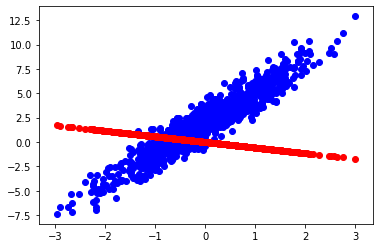

In [31]:
# plot inital examples and predictions 
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

**Train Model**

In [32]:
# I can use MSE 
def loss_function(predicted_y, true_y):
    """ predicted_y, true_y are tensor for minibatch  """
    return tf.reduce_mean(tf.square(predicted_y - true_y))

In [33]:
# initial loss before training
loss_function(predicted_y=predictions, true_y=outputs)

<tf.Tensor: id=294, shape=(), dtype=float32, numpy=17.03585>

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

In [35]:
model.trainable_variables

[<tf.Variable 'swyoo/dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.5730314]], dtype=float32)>,
 <tf.Variable 'swyoo/dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [36]:
def print_progress(epoch, max_epoch, step, max_step, loss, bar):
    """ print progressive states """
    # Status-message. Note the \r which means the line should
    # overwrite itself.
    msg = "\r Train Phase - epoch: {0:}/{1:} |step: {2:}/{3:} |loss: {4:.3f} |bar: {5:}".format(epoch, max_epoch, step, max_step, loss, bar)
    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush() 

In [37]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(inputs, outputs):
    """
    Global:
        model, optimizer
    Args:
        inputs, outputs
    """
    with tf.GradientTape() as T:
        loss_mini = loss_function(model(inputs), outputs)
    grads = T.gradient(target=loss_mini, sources=model.trainable_variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))
    # model.trainable_variables[0].assign_sub(0.1 * grads[0])
    # model.trainable_variables[1].assign_sub(0.1 * grads[1])
    return loss_mini

In [38]:
history = []
for e in range(EPOCHS):
    bar = ''
    loss = 0
    for s, batch_list in enumerate(batched_dataset.take(BATCH_SIZE)):
        X_mini, Y_mini = batch_list
        ###############################################
        # TODO: train for a step
        ###############################################
        loss_mini = train_step(X_mini, Y_mini)
        ###############################################
        bar+='#'
        print_progress(e+1, EPOCHS, s+1, STEPS, loss_mini, bar)
        loss += loss_mini
    history.append(loss.numpy()/STEPS)

 Train Phase - epoch: 10/10 |step: 10/10 |loss: 0.843 |bar: ##########

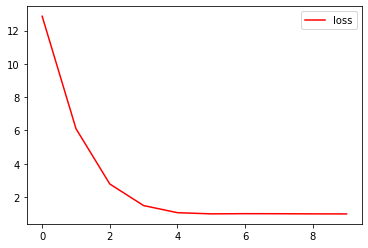

In [39]:
# loss 변화를 도식화합니다.
plt.plot(range(EPOCHS), history, 'r')
plt.legend(['loss'])
plt.show()

In [40]:
model.trainable_variables

[<tf.Variable 'swyoo/dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.0602922]], dtype=float32)>,
 <tf.Variable 'swyoo/dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([2.0209558], dtype=float32)>]

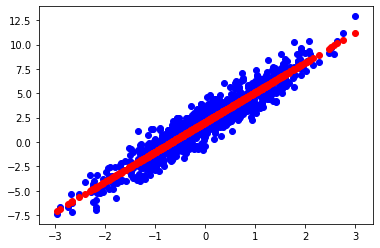

In [41]:
# plot inital examples and predictions 
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

# tf.function

In [1]:
@tf.function()
def add(a, b):
    return a + b

In [13]:
add(tf.ones([2, 2]), tf.ones([2, 2]))

<tf.Tensor: id=13, shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [14]:
v = tf.Variable(1.0)
with tf.GradientTape() as tape:
    result = add(v, 1.0)
tape.gradient(result, v)

<tf.Tensor: id=25, shape=(), dtype=float32, numpy=1.0>

--- 
### Appendix: Dataset 다루기
[offical guide](https://www.tensorflow.org/guide/data)

In [42]:
dataset = tf.data.Dataset.from_tensor_slices(inputs)

In [43]:
it = iter(dataset)

In [44]:
dataset.element_spec # 하나의 example에 대한 shape를 볼 수 있다. 

TensorSpec(shape=(), dtype=tf.float32, name=None)

In [45]:
dataset_x = tf.data.Dataset.from_tensor_slices(inputs)
dataset_y = tf.data.Dataset.from_tensor_slices(outputs)
dataset = tf.data.Dataset.zip((dataset_x, dataset_y))
batched_dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [46]:
batched_dataset

<BatchDataset shapes: ((100,), (100,)), types: (tf.float32, tf.float32)>

In [47]:
batched_dataset.element_spec

(TensorSpec(shape=(100,), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.float32, name=None))

In [48]:
for batch_list in batched_dataset.take(BATCH_SIZE):
    X, Y = batch_list
    print(X.shape, Y.shape)

(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
